## Statistics of Time Series

#### Concepts


* Stationarity

* Random walk vs. noise

* Dickey-Fuller Test

* Statsmodels output



In [2]:
import numpy as np
from matplotlib import pyplot as plt
import statsmodels

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import statsmodels
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa import stattools
import seaborn as sns

In [3]:
#flights = sns.load_dataset('flights').drop('year', axis=1)
df = pd.read_csv('flights_remainder.csv', index_col=0, parse_dates=True)

### Time Series and Distribution Functions

Time series: Set of values for a variable that are sequenced in time. 



**You can think of time series as a stochastic process in which, at each step, the value of your variable is drawn from a set of possible values (like we would draw any random variable from a distribution). (https://stats.stackexchange.com/questions/126791/is-a-time-series-the-same-as-a-stochastic-process)**

### Stationarity

In order to model your time series, you want it to be stationary. This ensures that every value is drawn from the same distribution so it's statistical properties don't change over time. 

* constant mean (df)

* constant variance (and covariance) (df)

* no seasonality


#### Example

In [4]:
def plotting_noise(x,y,label, text):
    plt.figure(figsize=[8,4])
    plt.plot(x, y, color='k',linewidth = 0.5,label = label)
    plt.xlabel('t')
    plt.ylabel('value')
    plt.text(7, min(y)*0.85 ,text, fontsize = 15, color = 'red')
    plt.legend()

In [5]:
x = np.linspace(0, 10, 1000) 
gaussian_noise = np.random.normal(size=1000)

In [6]:
np.random.seed(510)
normal_y = np.random.normal(0,1,1000)
random_walk_y = np.cumsum(normal_y)

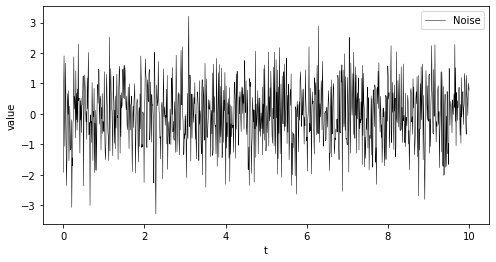

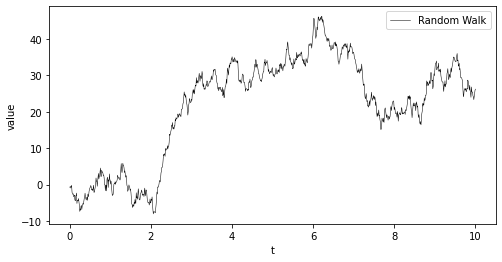

In [8]:
plotting_noise(x,gaussian_noise,'Noise', '')
plotting_noise(x,random_walk_y,'Random Walk', '')

#### Unit Root

A non-stationary time-series might have a unit root which means the solution to the characteristic equation that relates to the differential has at least one root that is equal to 1 (could also be larger).

This results in an upredictable systematic pattern (as opposed to a stationary series we'd use to get some predictions from). For instance, if some extreme event happened and your equation has a root that is equal or larger than 1, the system is not able to just bounce back in next step as a stationary process should do, it will likely be affected by that event for many more steps after that as the underlying process is not dampening the effect. 

Think about finance, can you connect this to a stable and less-stable economy?

**For the basic concept** 
https://www.statisticshowto.com/unit-root/

**Read the introduction of the following article on Wikipedia to Unit Root**
https://en.wikipedia.org/wiki/Unit_root

**If you are more into maths, go ahead and check how the characteristic equation is solved too**
https://en.wikipedia.org/wiki/Linear_difference_equation#Solution_of_homogeneous_case

#### Augmented Dickey-Fuller Test

Dickey - Fuller Test is a stationarity test for time series. It is measuring the likelihood of the solutions to the **differenced** form of the characteristic equation. Based on the significance level it associates with its statistical measure, you decide whether it's stationary or not.

https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

https://www.statsmodels.org/0.6.1/generated/statsmodels.tsa.stattools.adfuller.html

The null hypothesis is that the time series is NOT-stationary. So small p value means that you have a stationary series.

(More about hypothesis testing: https://statisticsbyjim.com/hypothesis-testing/one-tailed-two-tailed-hypothesis-tests/)

In [9]:
def print_adf(data):
    
    """ Prints the results of the augmented Dickey Fuller Test"""
    
    adf_stats, p, used_lag, n_obs, levels, information_criterion = \
            statsmodels.tsa.stattools.adfuller(data)
    
    print(f"""adf_stats: {adf_stats}
            p: {p} 
            used lag: {used_lag} 
            number of observations: {n_obs}
            CI 99%: {levels['1%']}
            CI 95%: {levels['5%']}
            CI 90%: {levels['10%']}
            information criterion (AIC): {information_criterion}
            """)
   

In [10]:
print_adf(gaussian_noise)

adf_stats: -29.951480659591805
            p: 0.0 
            used lag: 0 
            number of observations: 999
            CI 99%: -3.4369127451400474
            CI 95%: -2.864437475834273
            CI 90%: -2.568312754566378
            information criterion (AIC): 2767.412972243682
            


* The first number is the ADF-Stats, the more negative it is, the more confident we are that we don't have a random walk.

* In the lookup table (dictionary), the smallest value is -3.44 for the adf_stats. Hence from -32.75 < -3.4 we can reject the null hypothesis with a confidence level of more than 99% (p=0.01, highly significant result).


### Reading The Output Of The Statsmodels AutoReg

In [11]:
ar_model = AutoReg(endog=df['remainder'], lags=1).fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [12]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                  132
Model:                     AutoReg(1)   Log Likelihood                -453.876
Method:               Conditional MLE   S.D. of innovations              7.735
Date:                Thu, 28 Apr 2022   AIC                              4.137
Time:                        13:02:20   BIC                              4.203
Sample:                    02-01-1949   HQIC                             4.164
                         - 12-01-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.0882      0.676     -0.130      0.896      -1.413       1.236
remainder.L1     0.7597      0.057     13.310      0.000       0.648       0.872
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3164           +0.0000j            1.3164            0.0000
-----------------------------------------------------------------------------
"""

- Likelihood is a measure of the goodness of fit for your model to the data. 

https://stats.stackexchange.com/questions/132877/how-to-calculate-the-likelihood-function

- P value is a measure of the probability of the observed value occuring randomly (the hypothesis that you are trying to reject). A small p value means that the value is not likely to have occured randomly, and hence is significant. The p value cut-off of 0.05 (5%) is typical. In the above the high P value for the intercept suggests that we should probably try to improve the model. Or rather the intercept value we find isn't necessarily going to help our model. 

- The values [0.025	0.975] correspond to the 95% confidence level for both parameter values (intercept and slope). So 95% of possible values for the two coefficients are between these ranges.

- In time series, the innovation is the difference between the observed value and the forecast based on the past. (S.D: standard deviation). 

- AIC is the Akaike Information Criterion. We want to minimise it and this will happen for the smaller number of parameters and larger likelihood. 
     
     $$AIC = 2k - 2log(L)$$

- BIC is the Bayesian Information Criterion. It is very similar to AIC, but the penalty term for parameters is larger (logarithm of the number of observations used).

     $$BIC = k ln(n) - 2log(L)$$


- Root is the only parameter we do not talk about.

**Is the remainder it stationary?**

<AxesSubplot:xlabel='date'>

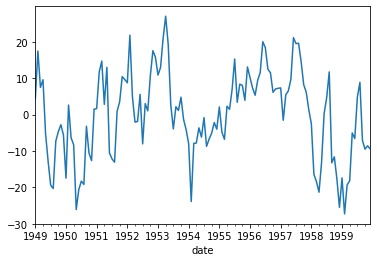

In [13]:
df.remainder.plot()

In [14]:
print_adf(df.remainder)

adf_stats: -2.675028745880824
            p: 0.07845995899280286 
            used lag: 13 
            number of observations: 118
            CI 99%: -3.4870216863700767
            CI 95%: -2.8863625166643136
            CI 90%: -2.580009026141913
            information criterion (AIC): 814.1283155536885
            


#### References:

https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

### BONUS

#### Covariance vs. Correlation


$$ cov_{xy}= \frac{\Sigma(x_i - x_m)(y_i -y_m)}{n-1} $$


While correlation is the strength of the relationsip between two variables, covariance is a measure of how they change together.

Auto-correlation is the relation between t and t-n.



$$\rho_{x,y}=\frac{cov_{x,y}}{\sigma_x \sigma_y}$$

**Correlation:** Relationship between variables. In the case of **auto-correlation**  we are looking at the same variable at different time steps in the same series. 

$$
Corr(y_t, y_{t-h}) = \frac{Cov(y_t, y_{t-h})} {\sigma^2(y_t)\, \sigma^2( y_{t-h})} 
$$

**Covariance:** Think about it as variance of two variables with each other. 

https://www.mygreatlearning.com/blog/covariance-vs-correlation/#differencebetweencorrelationandcovariance

Check out pd.cov(), pd.corr().